In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
def get_db_url(user, host, password, db, driver='pymysql'):
    return f'mysql+{driver}://{user}:{password}@{host}/{db}'

In [3]:
import env

In [4]:
url = get_db_url(env.user, env.host, env.password, db='employees')

In [5]:
from sqlalchemy import create_engine

#### Use the iris database to answer the following quesitons:

In [6]:
iris = sns.load_dataset('iris')
iris.head(7)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa


1a. What does the distribution of petal lengths look like?

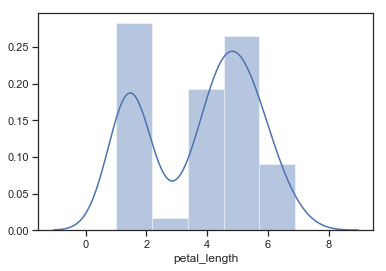

In [9]:
sns.distplot(iris.petal_length)

2a. Is there a correlation between petal length and petal width?

In [10]:
iris = sns.load_dataset('iris')
iris.head(7)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa


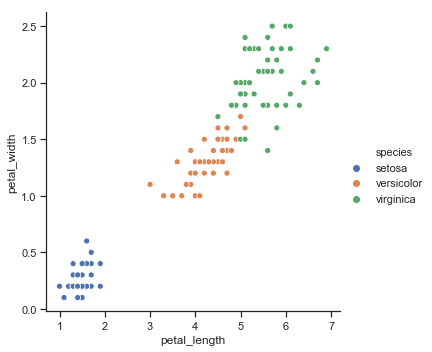

In [11]:
sns.relplot(x='petal_length', y='petal_width', hue='species', data=iris)

3a. Would it be reasonable to predict species based on sepal width and sepal length?

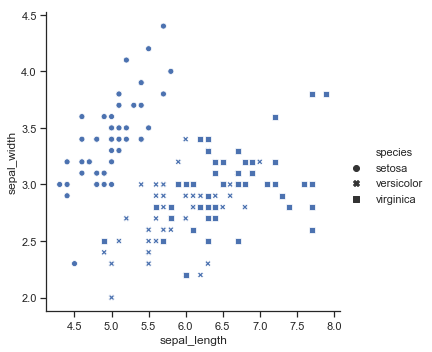

In [12]:
sns.relplot(x='sepal_length', y='sepal_width', style='species', data=iris)

4a. Which features would be best used to predict species?

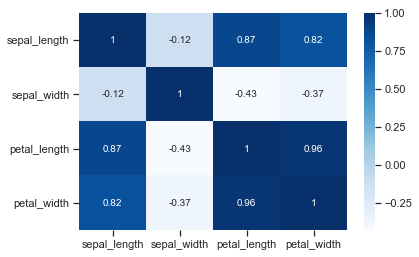

In [16]:
sns.heatmap(iris.corr(), annot=True, cmap=plt.cm.Blues)

1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

    - Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [17]:
anscombe = sns.load_dataset('anscombe')
anscombe.head(7)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24


In [20]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

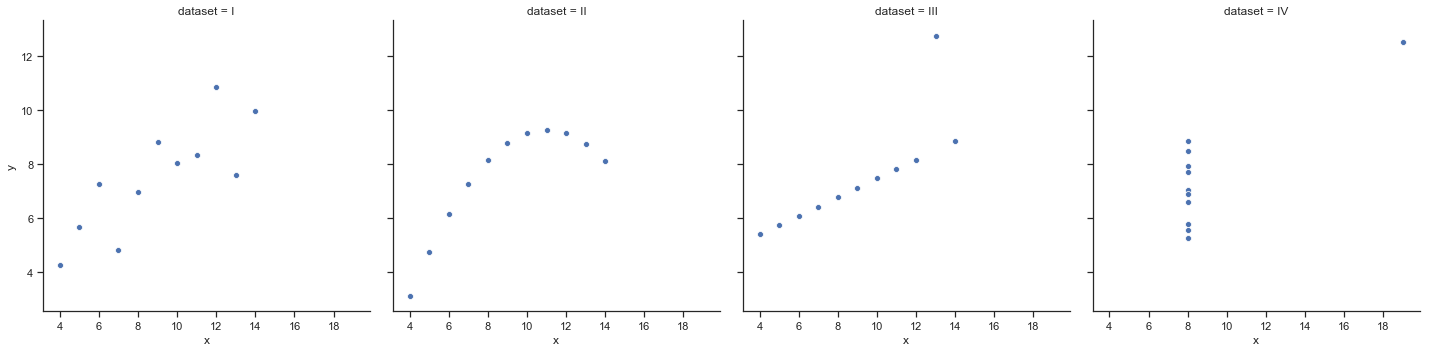

In [21]:
sns.relplot(data=anscombe, x='x', y='y', col='dataset')

2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [22]:
insectSprays = data('InsectSprays')
insectSprays.head(7)

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A


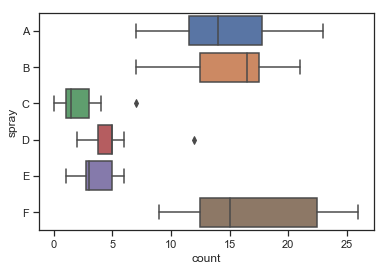

In [23]:
sns.boxplot(data=insectSprays, x='count', y='spray')

3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

In [24]:
swiss_df = data('swiss')
swiss_df.head(7)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6


3a. Create a column named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [30]:
swiss_df['is_catholic'] = swiss_df.Catholic > 80
swiss_df.head(7)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True


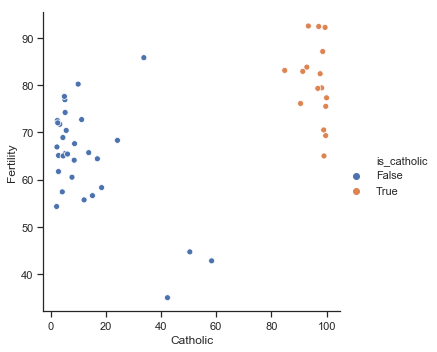

In [34]:
sns.relplot(data=swiss_df, x='Catholic', y='Fertility',hue='is_catholic')

3b. Does whether or not a province is Catholic influence fertility?

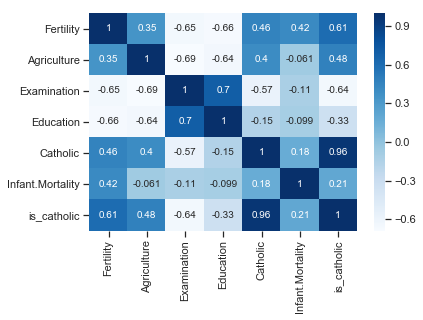

In [36]:
sns.heatmap(swiss_df.corr(), annot=True, cmap=plt.cm.Blues)

3c. What measure correlates most strongly with fertility?

In [40]:
swiss_df[['Education','Fertility']].corr()

,Education,Fertility
Education,1.000000,-0.663789
Fertility,-0.663789,1.000000


4. Using the chipotle dataset from the previous exercise, create a barplot that shows the 4 most popular items and the revenue produced by each.

In [91]:
def get_db_url(db, user, host, password):
    from sqlalchemy import create_engine
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return create_engine(url)
from env import user, host, password
conn = get_db_url('chipotle', user, host, password)
chipotle_df = pd.read_sql('select * from orders;', conn)

In [92]:
chipotle_df.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [93]:
most_popular = chipotle_df[['item_name', 'quantity']].groupby('item_name', as_index=False).sum().sort_values(by='quantity', ascending=False).head(4)

In [94]:
most_popular

,item_name,quantity
17,Chicken Bowl,761
18,Chicken Burrito,591
25,Chips and Guacamole,506
39,Steak Burrito,386


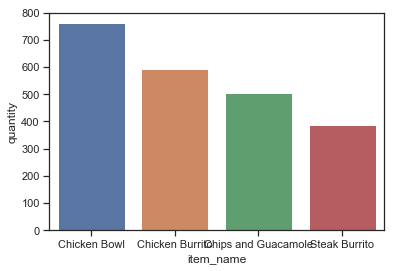

In [95]:
sns.barplot(x='item_name', y='quantity', data=most_popular)

5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line plot of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [96]:
sleep = data('sleepstudy')

In [97]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

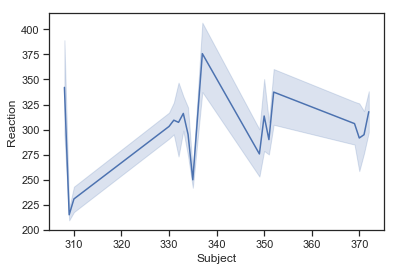

In [98]:
sns.lineplot(x='Subject', y='Reaction', data=sleep)

In [104]:
reaction_time = sleep[['Subject', 'Reaction']].groupby('Subject').max() - sleep[['Subject', 'Reaction']].groupby('Subject').min()
reaction_time['reaction_over_time'] = reaction_time / 9

In [105]:
reaction_time.head()

,Reaction,reaction_over_time
Subject,,
308,216.7935,24.088167
309,34.3364,3.815156
310,66.6803,7.408922
330,73.8091,8.201011
331,86.5811,9.620122


In [106]:
reaction_time['Subject'] = reaction_time.index

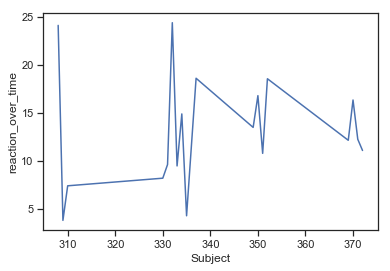

In [107]:
sns.lineplot(x='Subject', y='reaction_over_time', data = reaction_time)

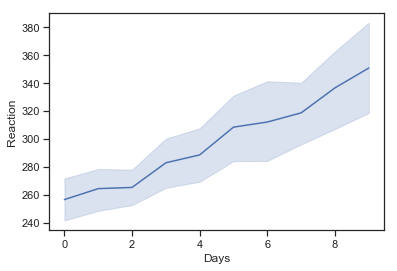

In [108]:
sns.lineplot(x='Days',y='Reaction', data = sleep)

In [81]:
sleep.Subject = 'Subject ' + sleep.Subject.astype('str')

In [83]:
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,Subject 308
2,258.7047,1,Subject 308
3,250.8006,2,Subject 308
4,321.4398,3,Subject 308
5,356.8519,4,Subject 308


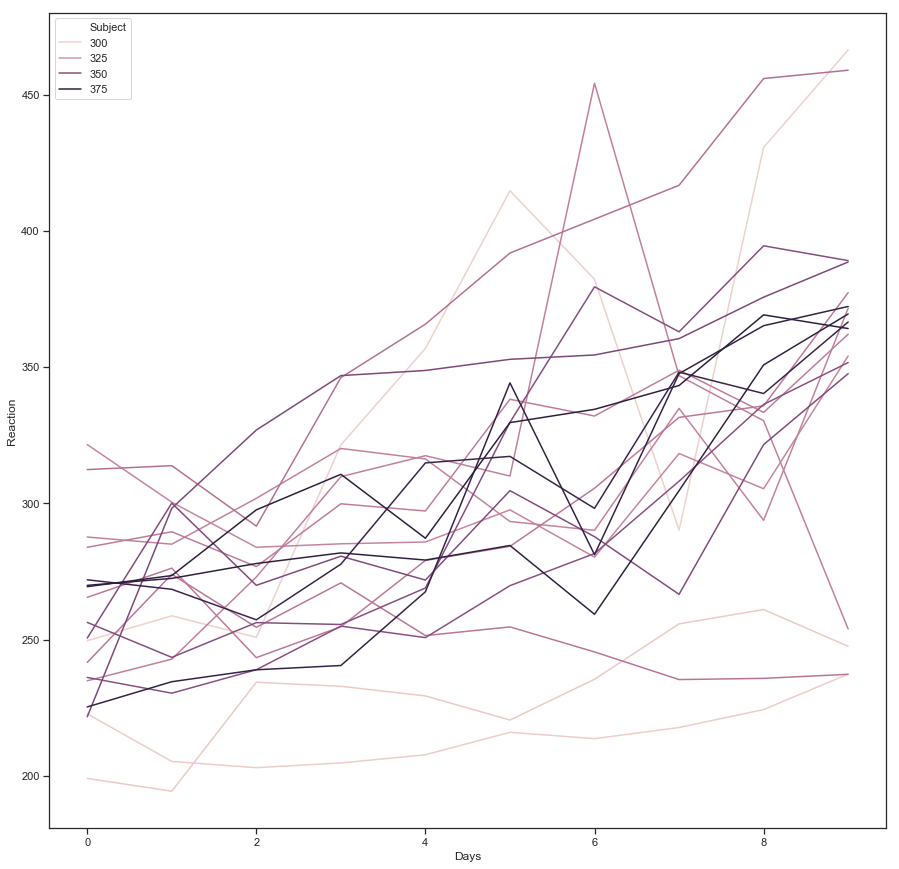

In [109]:
plt.figure(figsize=(15, 15))
sns.lineplot(x='Days', y='Reaction', hue='Subject', data=sleep)